In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],encoding='latin1')

In [3]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
# checking if any null values
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


May be there are outliers present in 'KM','cc','Quarterly_tax columns <br>
as max values are significantly larger than third quantiles


In [7]:
# renaming column names 
df.rename({'Age_08_04':'Age','Quarterly_Tax':'QuarterlyTax'},axis=1,inplace=True)
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
# Storing feature names for later use
features=df.columns[1:]

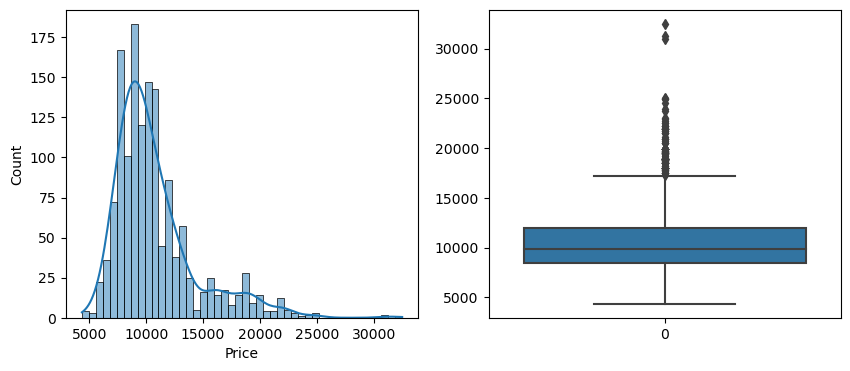

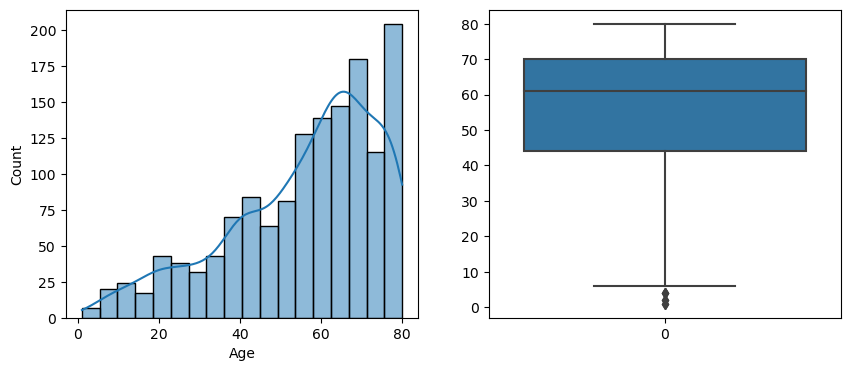

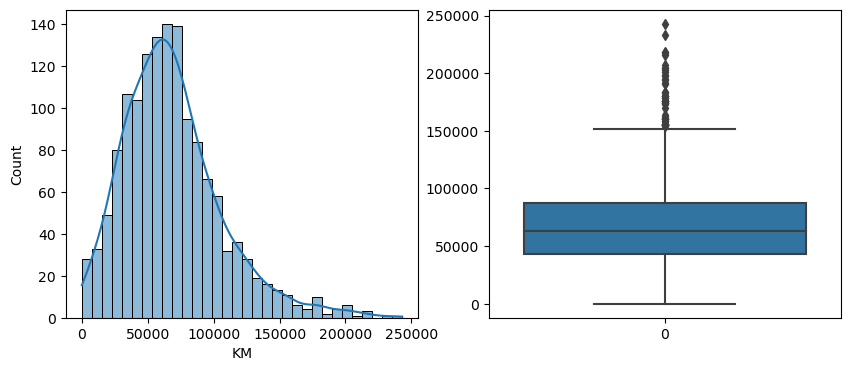

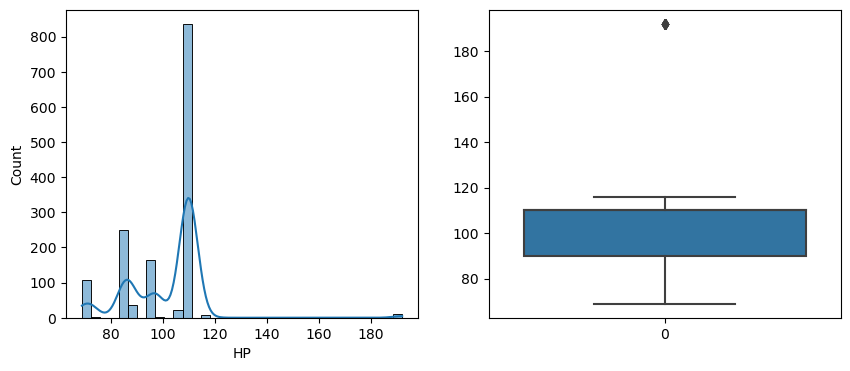

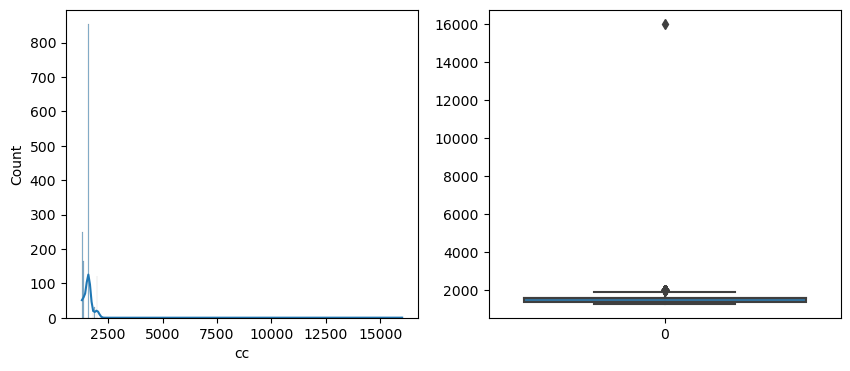

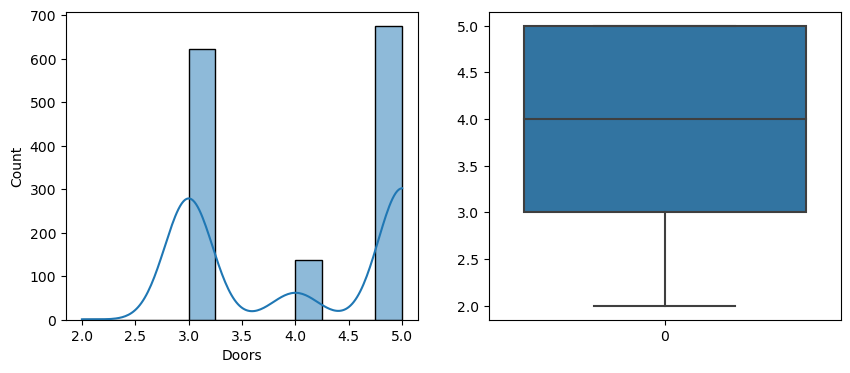

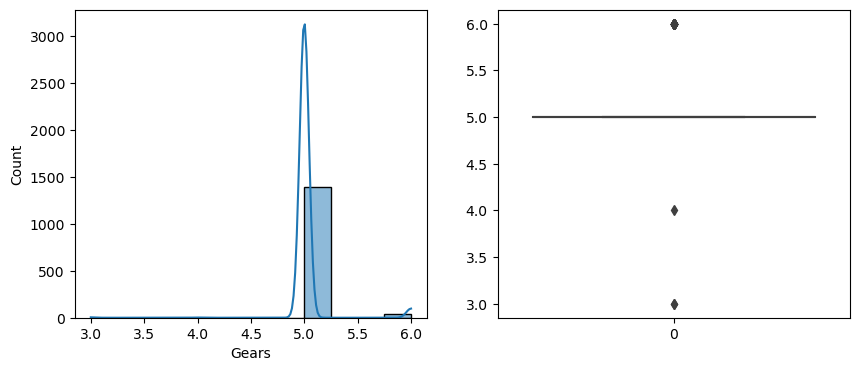

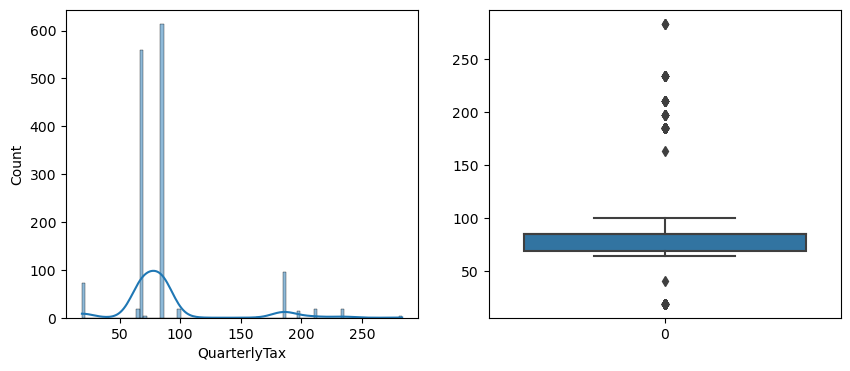

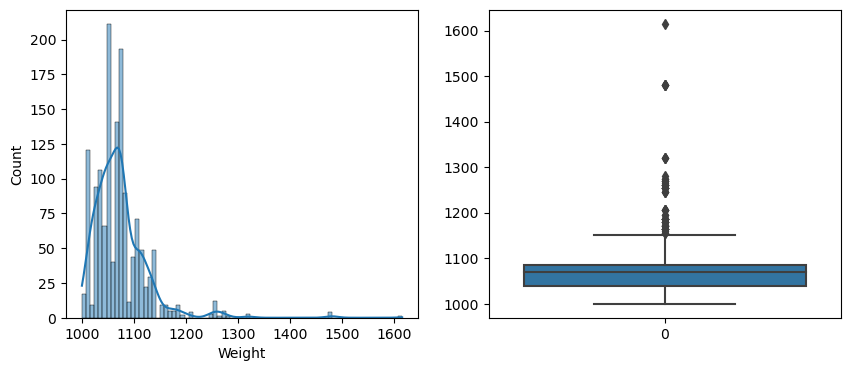

In [9]:
# # plotting histogram and box plot to check normality and present of outliers
for i in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sn.histplot(df[i],kde=True)
    plt.subplot(1,2,2)
    sn.boxplot(df[i],orient='v')
    plt.show()

Seems like 5 columns are catagorical features
<br>Also none of them forms a normal distribution
<br> So many outliers present inside our data


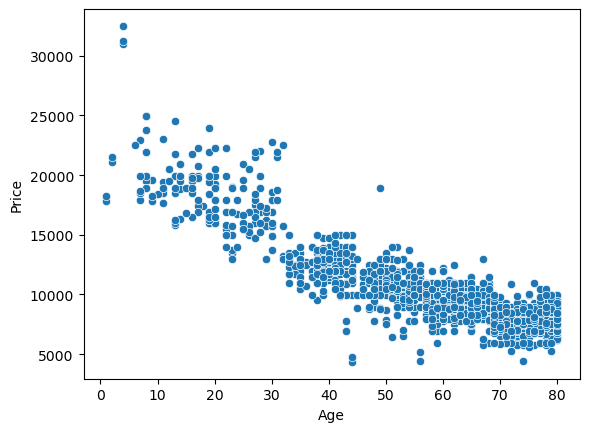

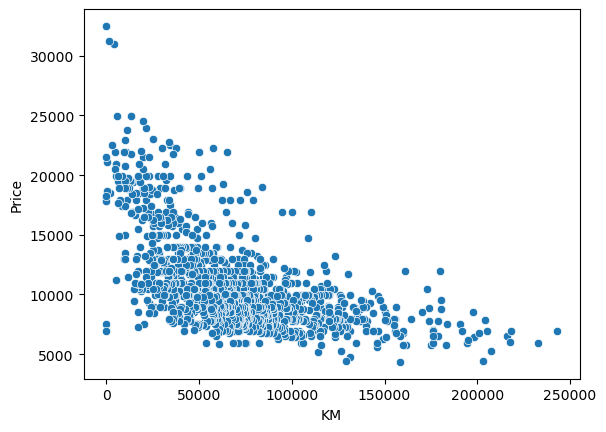

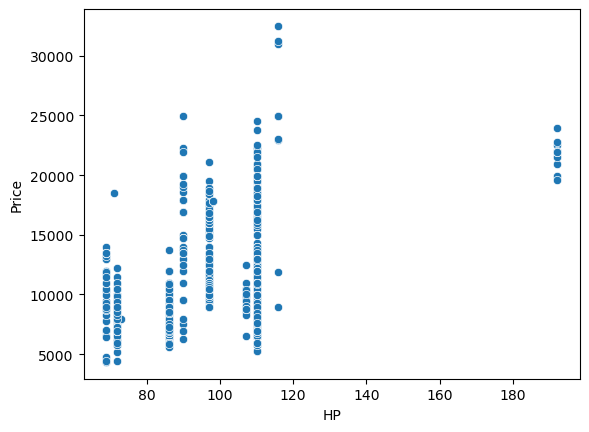

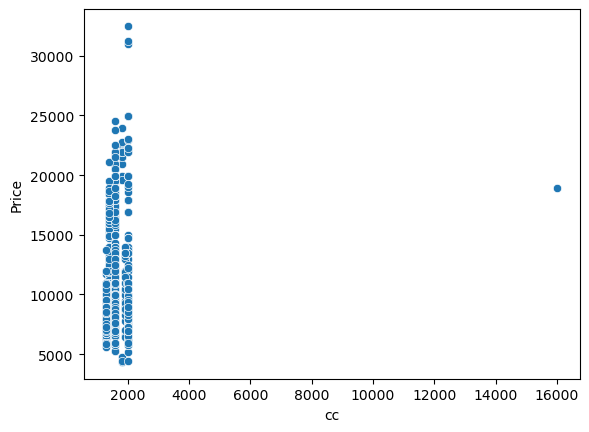

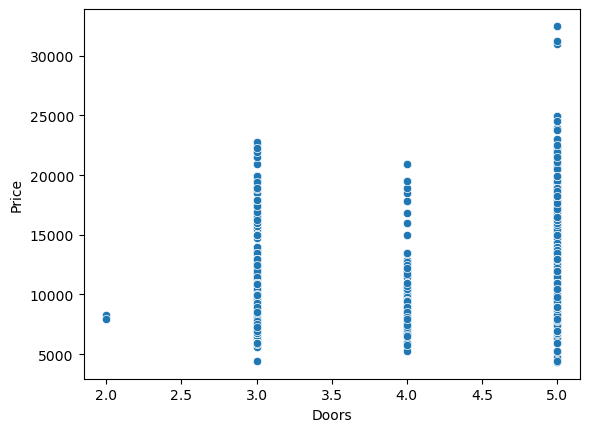

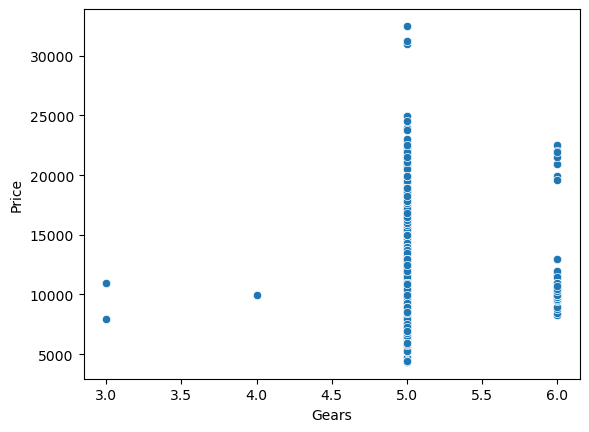

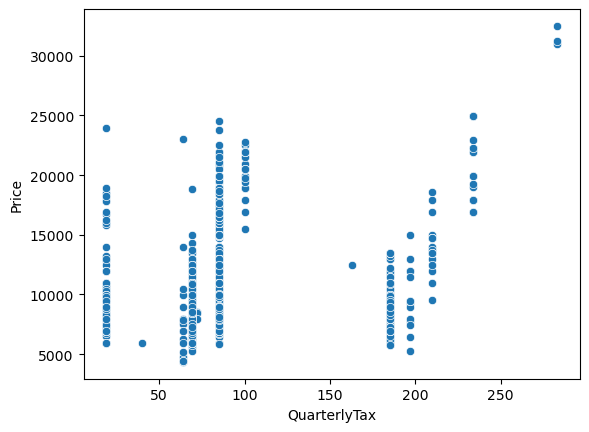

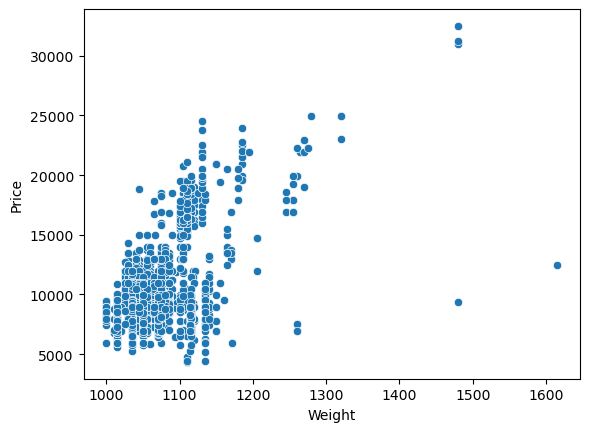

In [10]:
# plotting scatterplot with each feature and target
for i in features:
    sn.scatterplot(x=df[i],y=df['Price'])
    plt.show()

We can see there is a inverse relation ship with car price and age<br>
older car has less value compared to newer one


In [11]:
# Checking what is the performance of our model
model=smf.ols(f"Price~{'+'.join(features)}",df).fit()
score=model.rsquared
score

0.8637627463428192

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:14:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age           -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM              -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP              31.6809      2.818     11.241      0.000      26.152      37.209
cc              -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors           -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears          594.3199    197.055      3.016      0.003     207.771     980.869
QuarterlyTax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'cc' and 'Doors' has a higher p value


<AxesSubplot:>

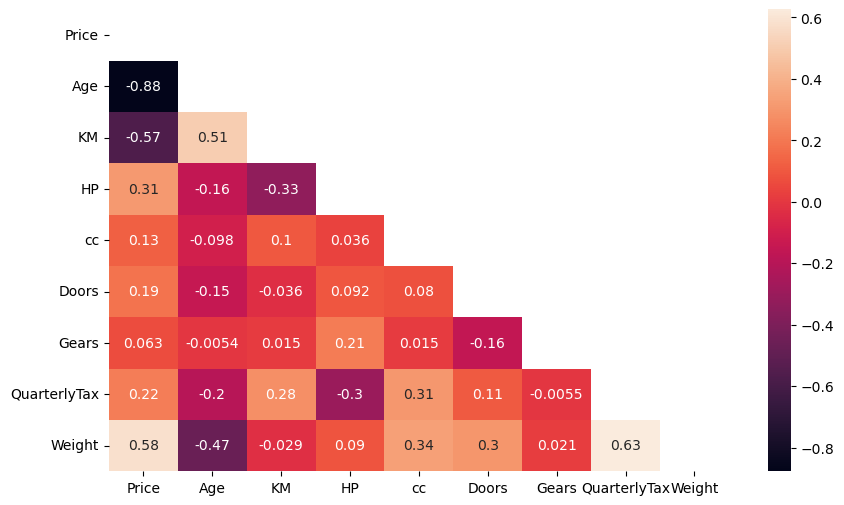

In [13]:
# So checking correlation
plt.figure(figsize=(10,6))
sn.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()))

'Age' and 'Weight' column has neagative correlation<br>
'Weight' and 'QuarterlyTaxWeight' are also correlated<br>
note here we are checking correlation between fature vs feature

In [14]:
# checking VIF
vif=[]
for i in features:
    vif.append(1/(1-smf.ols(f"{i}~{'+'.join([x for x in features if x!=i])}",df).fit().rsquared))

In [15]:
# comparing scores
pd.DataFrame({'Target':features,'VIF Value':vif})

,Target,VIF Value
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QuarterlyTax,2.311431
7,Weight,2.516420


VIF does not helps us too much

In [16]:
# Now we will check if we need all features
# By removing each feature and comparing score we can check it
r_sc=[]
for i in features:
    r_sc.append(smf.ols(f"Price~{'+'.join([x for x in features if x!=i])}",df).fit().rsquared)

In [17]:
# Checking scores
pd.DataFrame({'Removed Feature':features,'Scores':r_sc})

,Removed Feature,Scores
0,Age,0.657225
1,KM,0.837386
2,HP,0.851699
3,cc,0.863590
4,Doors,0.863763
5,Gears,0.862894
6,QuarterlyTax,0.862895
7,Weight,0.839688


A huge score gape can be noticed when we remove 'Age' from our feauture.<br> Note our model score was 0.863762 previously.<br>
Less than 1% of score decreased when we remove 'cc','Doors','Gears' and 'QuaterlyTax'

In [18]:
# Again creating a model without these feature
model_1=smf.ols('Price~Age+KM+HP+Weight',df).fit()
model_1.rsquared

0.8617758687562084

In [19]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:14:58   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
Age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
HP            30.2119      2.539     11.897      0.000      25.230      35.193
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we get a better model 

In [20]:
# Checking the presence of outlier
# we will use cooks distance for it
c,_=model_1.get_influence().cooks_distance

<StemContainer object of 3 artists>

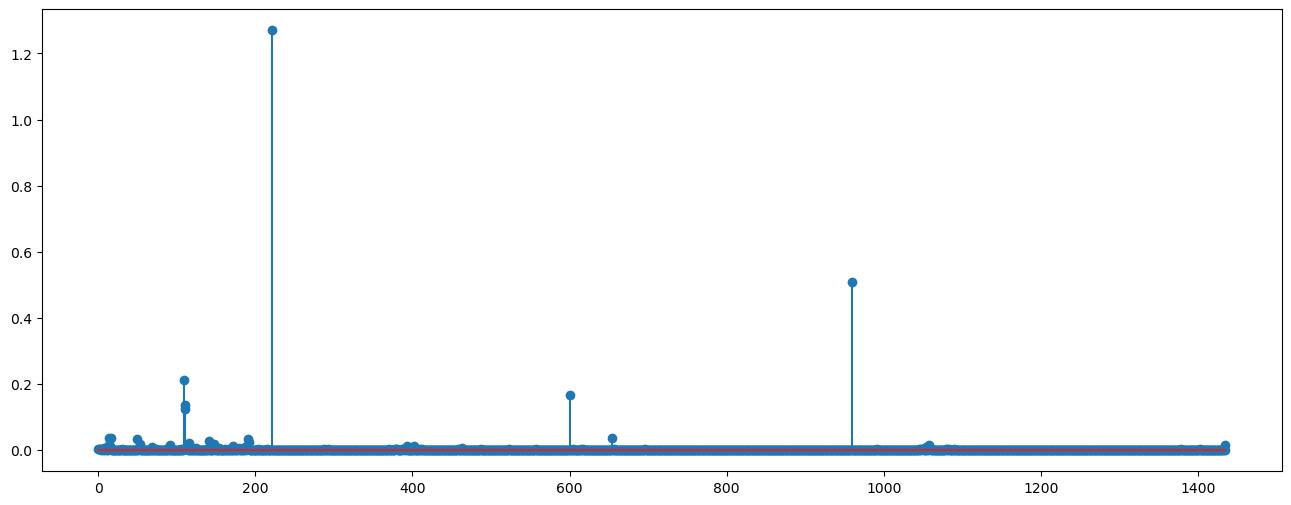

In [21]:
# plotting cooks distance
plt.figure(figsize=(16,6))
plt.stem(c)

 Seems like there are some outlier present inside the data

In [22]:
# Treating Outliers

outliers=np.where(c>3*(4+1)/len(df))[0]

In [23]:
df.loc[outliers].shape

(25, 9)

In [24]:
# 25 no of outliers present inside our data
# Now removing outliers from my data

del_df=df.iloc[:,[0,1,2,3,-1]].copy()         # first make a copy of dataframe
del_df.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [25]:
del_df.drop(outliers,inplace=True)

In [26]:
del_df.shape,df.shape

((1411, 5), (1436, 9))

In [27]:
# making model out of it
del_model=smf.ols('Price~Age+KM+HP+Weight',del_df).fit()
del_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2491.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:14:59   Log-Likelihood:                -11974.
No. Observations:                1411   AIC:                         2.396e+04
Df Residuals:                    1406   BIC:                         2.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5256.9379    999.210     -5.261      0.000   -7217.040   -3296.836
Age         -115.8142      2.421    -47.843      0.000    -120.563    -111.066
KM            -0.0210      0.001    -19.009      0.000      -0.023      -0.019
HP            19.6045      2.467      7.947      0.000      14.765      24.444
Weight        20.4359      0.868     23.544      0.000      18.733      22.139
==============================================================================
Omnibus:                       24.490   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.410
Skew:                           0.170   Prob(JB):                     1.24e-08
Kurtosis:                       3.710   Cond. No.                     2.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Treating outlier with replacing mean value
mean_df=df.iloc[:,[0,1,2,3,-1]].copy()

In [29]:
del_df.columns

Index(['Price', 'Age', 'KM', 'HP', 'Weight'], dtype='object')

In [30]:
df['HP'].value_counts()

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64

In [31]:
# Seems like 'HP' column is a catagorical feature
# So we will replace that feature with median
# rest will fill with mean

mean_df.iloc[outliers,3]=df['HP'].value_counts().index[0]


In [32]:
median_df=mean_df.copy()        # making a copy so that we can use later
# replacing outlier with mean
mean_df.iloc[outliers,[0,1,2,4]]=np.mean(mean_df.iloc[:,[0,1,2,4]],axis=0)

In [33]:
# making model and checking score
mean_model=smf.ols('Price~Age+KM+HP+Weight',mean_df).fit()
mean_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2534.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:14:59   Log-Likelihood:                -12174.
No. Observations:                1436   AIC:                         2.436e+04
Df Residuals:                    1431   BIC:                         2.438e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5242.3239    990.404     -5.293      0.000   -7185.123   -3299.525
Age         -115.8044      2.400    -48.255      0.000    -120.512    -111.097
KM            -0.0210      0.001    -19.200      0.000      -0.023      -0.019
HP            19.4466      2.436      7.984      0.000      14.669      24.224
Weight        20.4353      0.861     23.748      0.000      18.747      22.123
==============================================================================
Omnibus:                       28.160   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.719
Skew:                           0.178   Prob(JB):                     3.21e-10
Kurtosis:                       3.777   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# replacing outlier with mean
median_df.iloc[outliers,[0,1,2,4]]=np.median(median_df.iloc[:,[0,1,2,4]],axis=0)
# creating model
median_model=smf.ols('Price~Age+KM+HP+Weight',median_df).fit()
median_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2529.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:14:59   Log-Likelihood:                -12176.
No. Observations:                1436   AIC:                         2.436e+04
Df Residuals:                    1431   BIC:                         2.439e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5159.9898    990.620     -5.209      0.000   -7103.214   -3216.766
Age         -116.0740      2.399    -48.379      0.000    -120.780    -111.368
KM            -0.0209      0.001    -19.109      0.000      -0.023      -0.019
HP            19.2197      2.441      7.874      0.000      14.431      24.008
Weight        20.3845      0.861     23.671      0.000      18.695      22.074
==============================================================================
Omnibus:                       28.568   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.495
Skew:                           0.189   Prob(JB):                     3.59e-10
Kurtosis:                       3.765   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# making data frame to understand it better
pd.DataFrame({'Outlier Treatment':['Removed','mean','Median'],'Scores':[del_model.rsquared,mean_model.rsquared,median_model.rsquared]})

,Outlier Treatment,Scores
0,Removed,0.876330
1,mean,0.876289
2,Median,0.876087


Removing outlier gives us slightly better result<br>
continuing with del_model

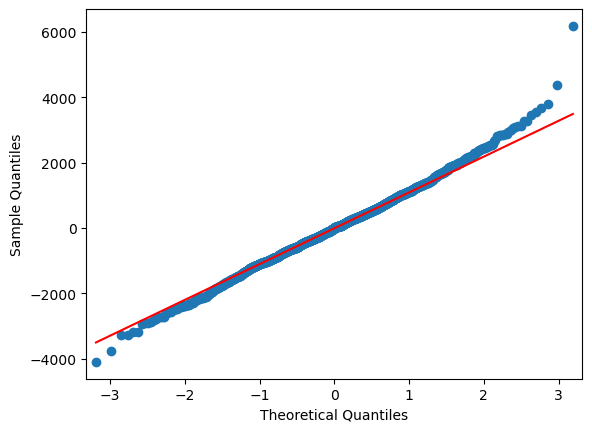

In [36]:
# Plotting QQ plot to check wheather error comes from normal distribution
pl=sm.qqplot(del_model.resid,line='q')

Seems ok

In [37]:
# Checking for homoschedasticity

def make_standardise(x):
    return (x-np.mean(x))/np.std(x)


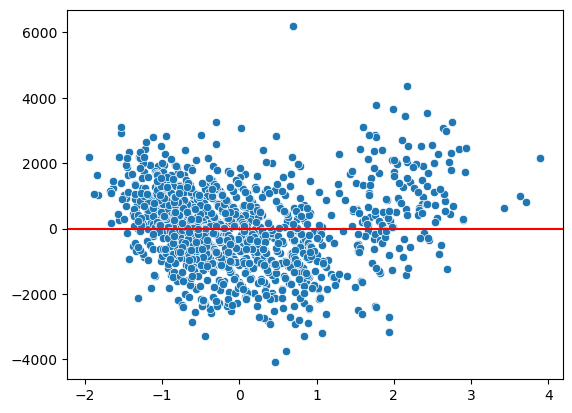

In [38]:
# ploting scatterplot 
sn.scatterplot(x=make_standardise(del_model.predict()),y=del_model.resid)
plt.axhline(y=0,color='r')

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


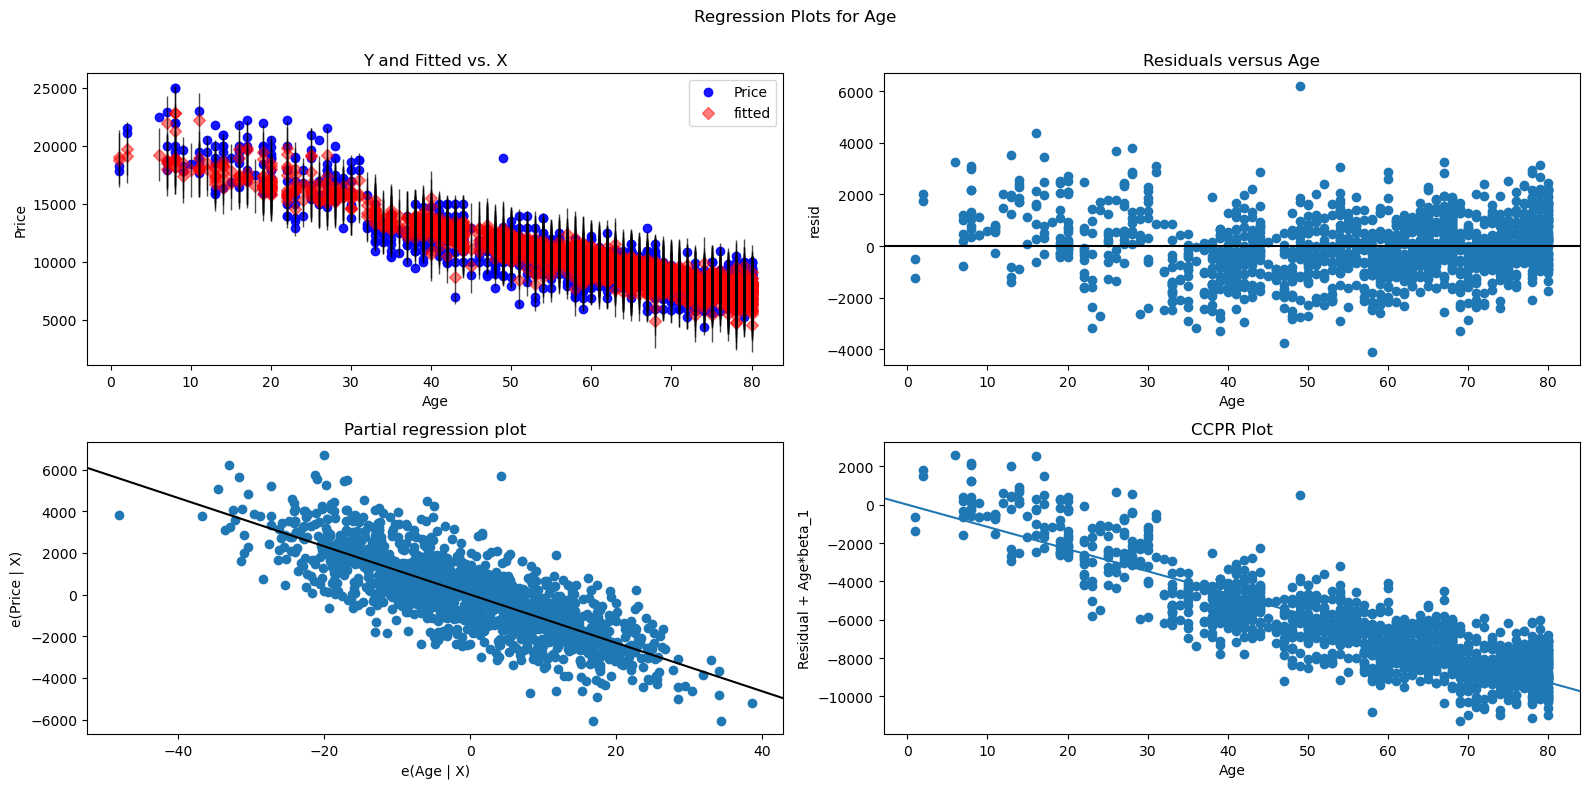

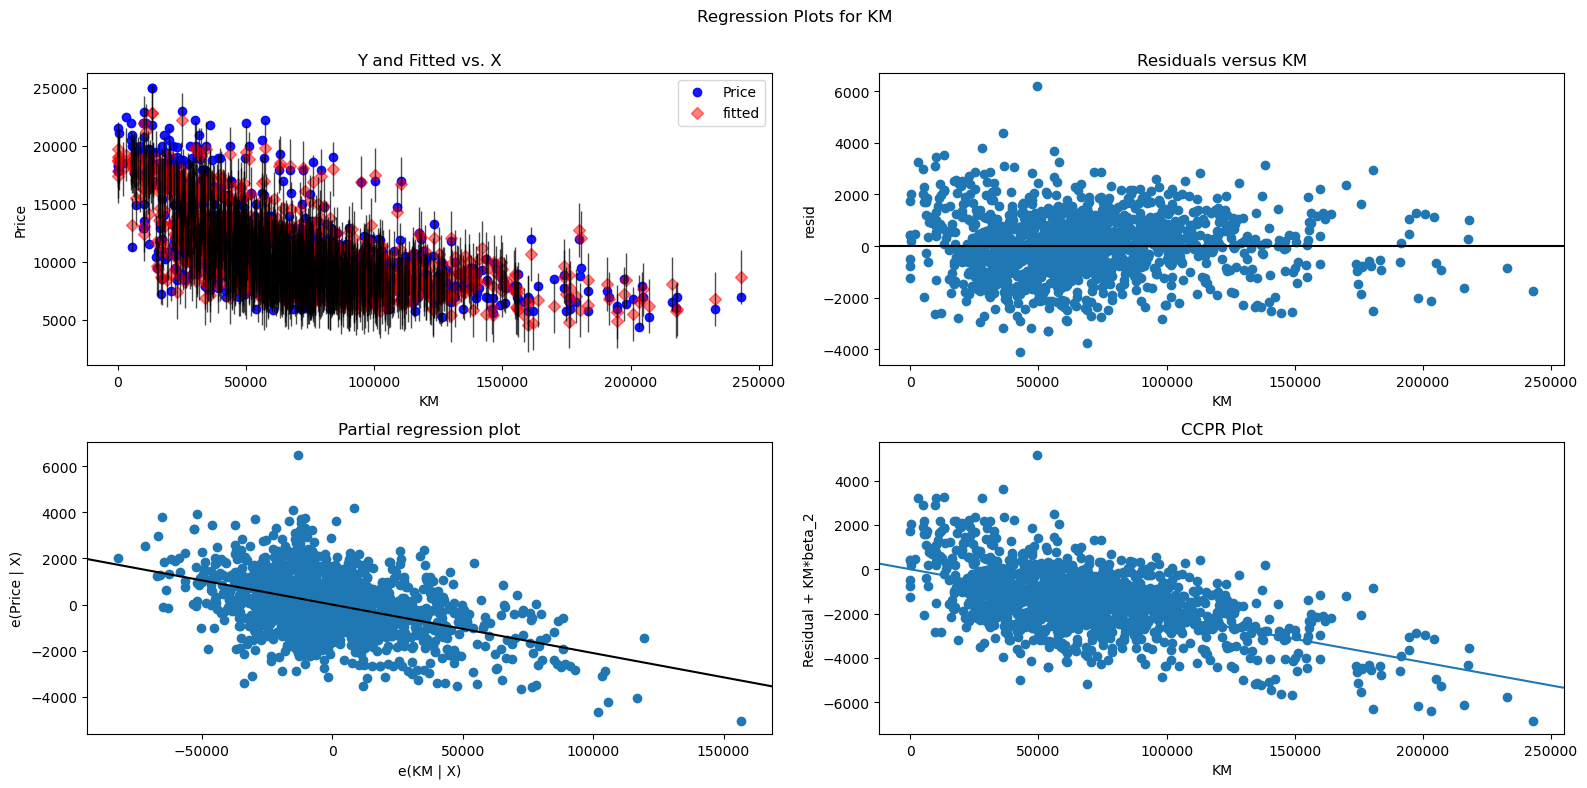

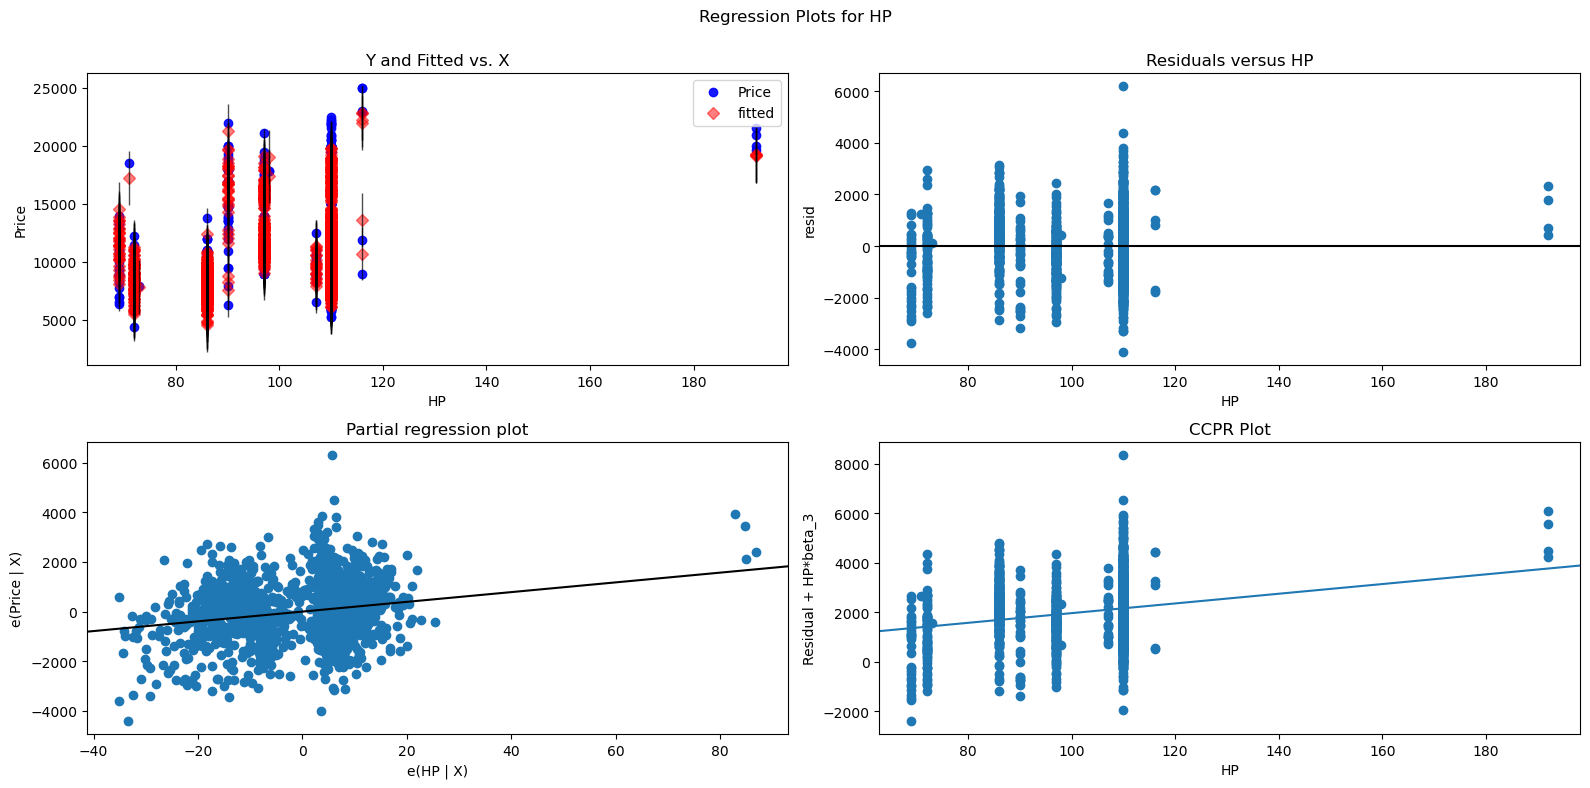

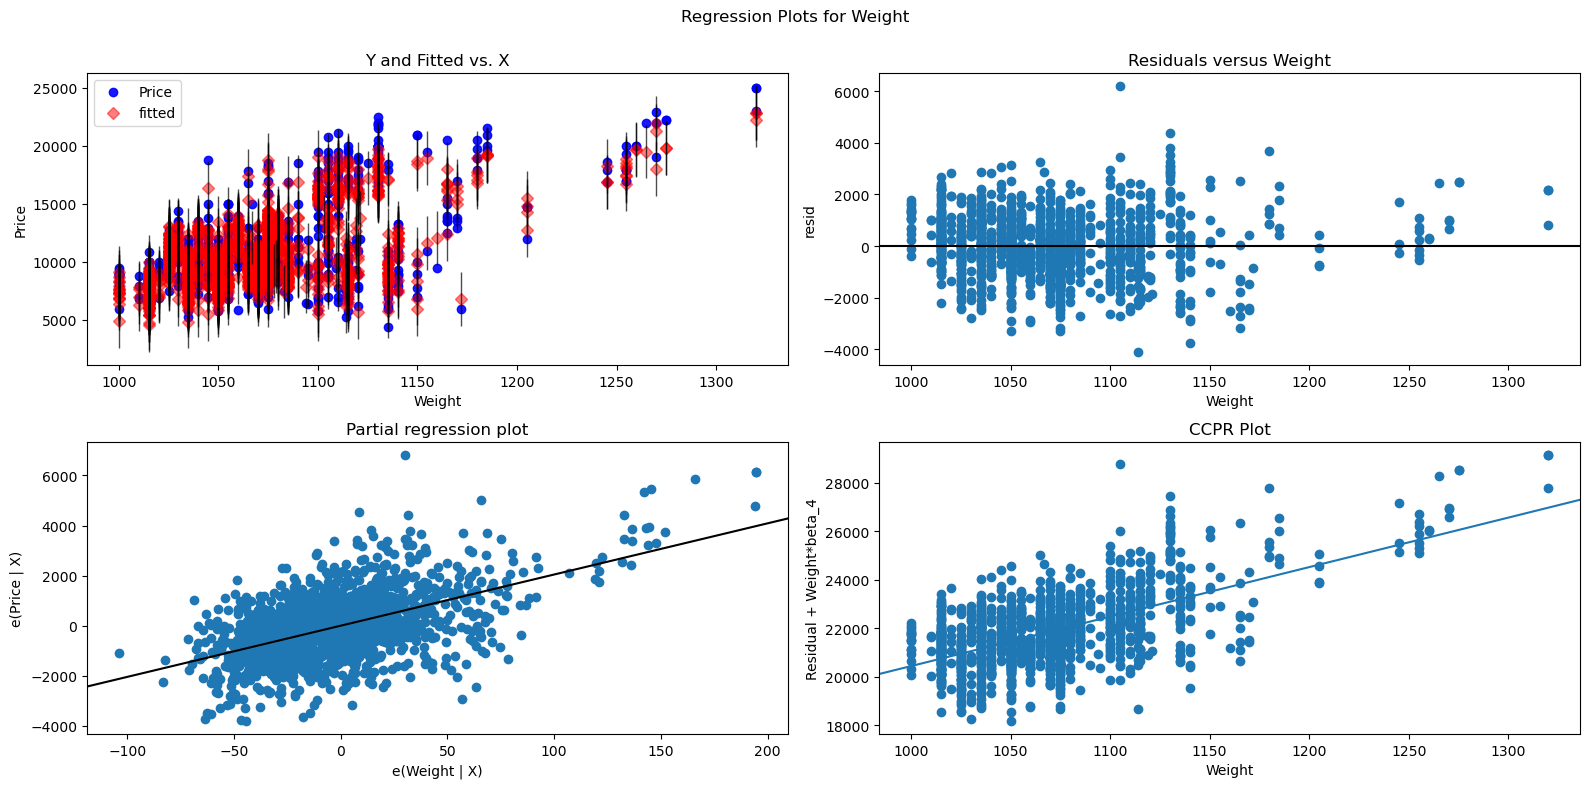

In [39]:
# Checking if features are correlated to error or not
for i in del_df.columns[1:]:
    a=sm.graphics.plot_regress_exog(del_model,i,plt.figure(figsize=(16,8)))

There is no such relation with error and feature

In [40]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


<AxesSubplot:>

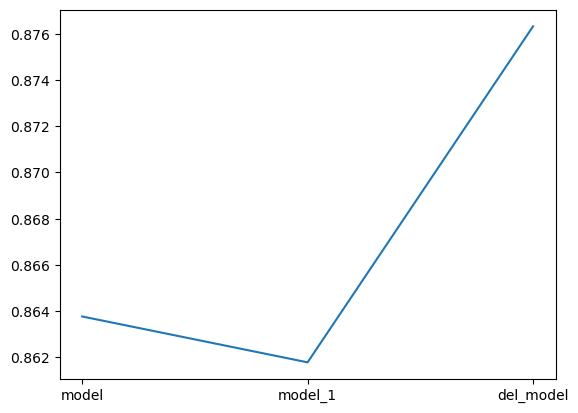

In [41]:
# visualising the scores 
sn.lineplot(x=['model','model_1','del_model'],y=[model.rsquared,model_1.rsquared,del_model.rsquared])

In [42]:
df['predicted']=del_model.predict(df)

In [43]:
df

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight,predicted
0,13500,23,46986,90,2000,3,5,210,1165,16665.525093
1,13750,23,72937,90,2000,3,5,210,1165,16120.919980
2,13950,24,41711,90,2000,3,5,210,1165,16660.411496
3,14950,26,48000,90,2000,3,5,210,1165,16296.802718
4,13750,30,38500,90,2000,3,5,210,1170,16135.091402
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8953.535347
1432,10845,72,19000,86,1300,3,5,69,1015,8434.135860
1433,8500,71,17016,86,1300,3,5,69,1015,8591.586111
1434,7250,70,16916,86,1300,3,5,69,1015,8709.498925


<AxesSubplot:xlabel='Price', ylabel='predicted'>

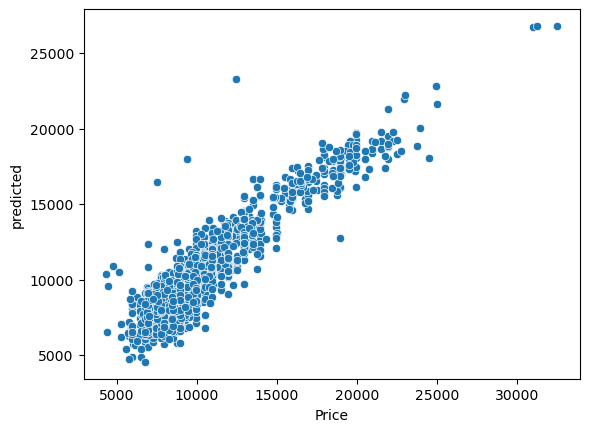

In [44]:
# Actual vs predicted
sn.scatterplot(x=df['Price'],y=df['predicted'])

                                                            ----- X -----